#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles.

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [ ]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.5/363.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.4/871.4 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 638.7/638.7 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 3.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=e6a515f3bd4cf24d23d7e43a2f232adc3e91346f2e4025442389d002936d0404
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [ ]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [ ]:
import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

In [ ]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open ("LHCb_Data/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [ ]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [ ]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

print(data)

[375, -4.99e+03, -1.27e+03, -721, 398, ..., 2.61e+03, 2.61e+03, -295, 499]


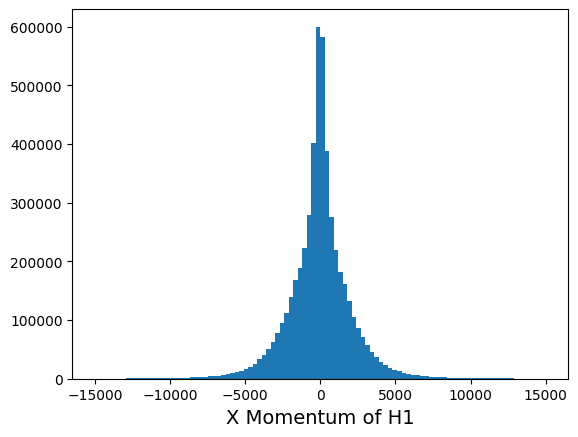

In [ ]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

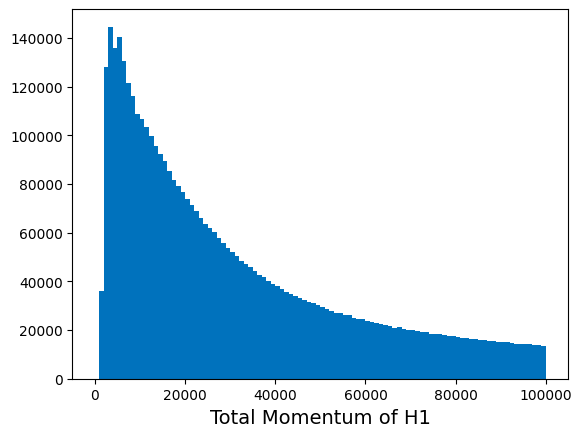

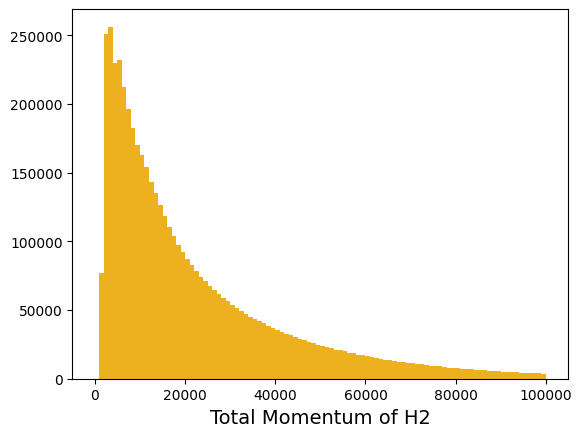

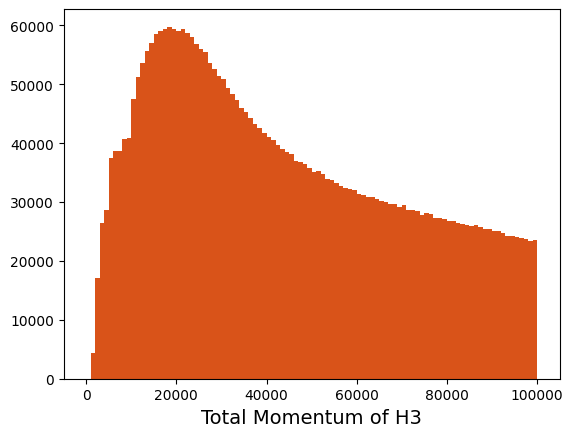

In [17]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events = f['DecayTree']

H1_PX = Events['H1_PX'].array()
H1_PY =  Events['H1_PY'].array()
H1_PZ =  Events['H1_PZ'].array()

H2_PX = Events['H2_PX'].array()
H2_PY =  Events['H2_PY'].array()
H2_PZ =  Events['H2_PZ'].array()

H3_PX = Events['H3_PX'].array()
H3_PY =  Events['H3_PY'].array()
H3_PZ =  Events['H3_PZ'].array()


# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot = np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)

H2_Ptot = np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)

H3_Ptot = np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)

# then here you can plot something (remember to adjust the range)
plt.figure();
plt.hist (H1_Ptot, bins=100, range=(0,100000), color ='#0072BD');
plt.xlabel('Total Momentum of H1', fontsize=14);

plt.figure();
plt.hist (H2_Ptot, bins=100, range=(0,100000), color='#EDB120');
plt.xlabel('Total Momentum of H2', fontsize=14);

plt.figure();
plt.hist (H3_Ptot, bins=100, range=(0,100000), color='#D95319');
plt.xlabel('Total Momentum of H3', fontsize=14);


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

[1.75e+05, 4.19e+05, 1.94e+05, 1.22e+05, ..., 5.41e+04, 1.58e+05, 1.42e+05]


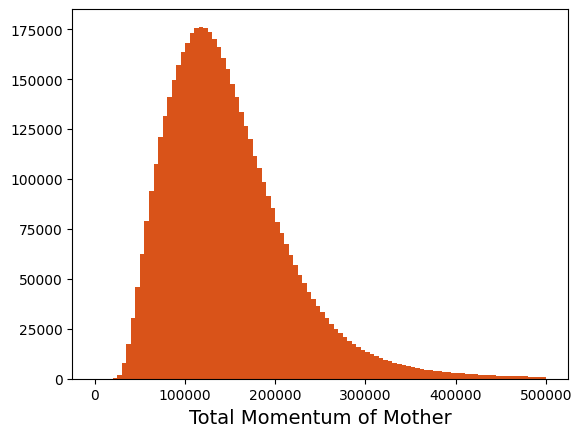

In [18]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...

BX_Ptot = H1_PX + H2_PX + H3_PX
BY_Ptot = H1_PY + H2_PY + H3_PY
BZ_Ptot = H1_PZ + H2_PZ + H3_PZ

B_Ptot = np.sqrt(BX_Ptot**2 + BY_Ptot**2 + BZ_Ptot**2)

print(B_Ptot)

plt.figure();
plt.hist (B_Ptot, bins=100, range=(0, 500000), color ='#D95319');
plt.xlabel('Total Momentum of Mother', fontsize=14);

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [19]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches = Events.arrays()

# figure out how to convert to the python 'list' format and use it there
branches_dictionary = branches.tolist()

# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
for branch, value in branches_dictionary[45].items():
    print(branch, value)

KeyboardInterrupt: 

Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

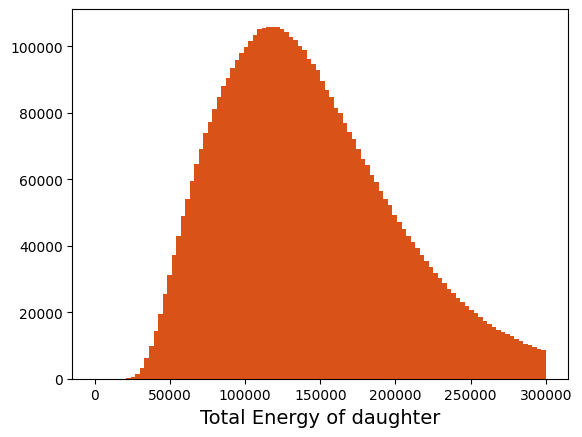

In [20]:
mass_kaon = 497.611 #mass (MeV/c2)

# Calculate the energy of each daughter particle
daughter_energy_1 = np.sqrt(H1_Ptot**2 + mass_kaon**2)
daughter_energy_2 = np.sqrt(H2_Ptot**2 + mass_kaon**2)
daughter_energy_3 = np.sqrt(H3_Ptot**2 + mass_kaon**2)

# The total energy of all daughter particles
total_energy_daughter = daughter_energy_1 + daughter_energy_2 + daughter_energy_3

plt.figure();
plt.hist (total_energy_daughter, bins=100, range=(0, 300000), color='#D95319');
plt.xlabel('Total Energy of daughter', fontsize=14);
plt.show()


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

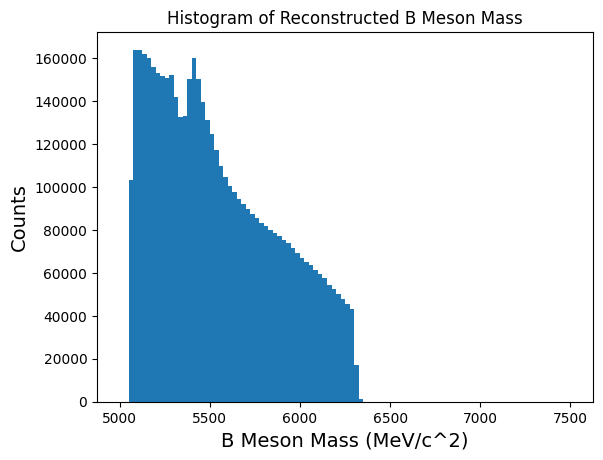

In [21]:
# Calculate the mass of the B meson
B_mass = np.sqrt( (total_energy_daughter**2) - (B_Ptot**2))

plt.figure()
plt.hist(B_mass, bins=100, range=(5000, 7500))
plt.xlabel('B Meson Mass (MeV/c^2)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Histogram of Reconstructed B Meson Mass')
plt.show()


We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

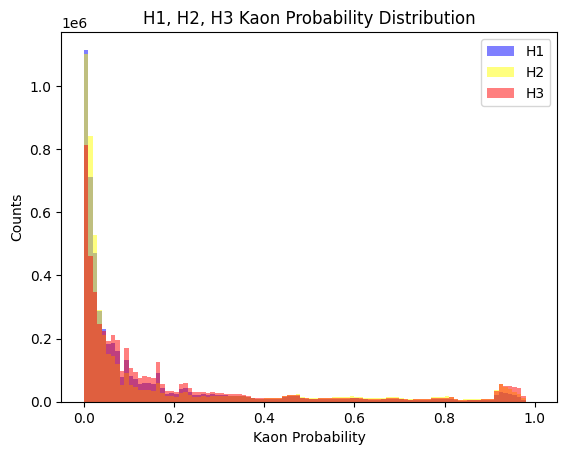

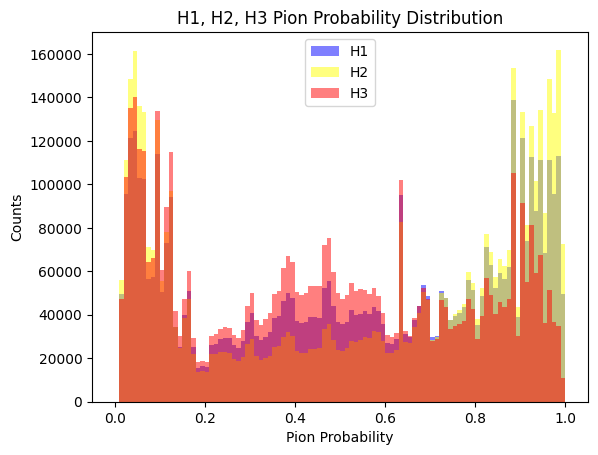

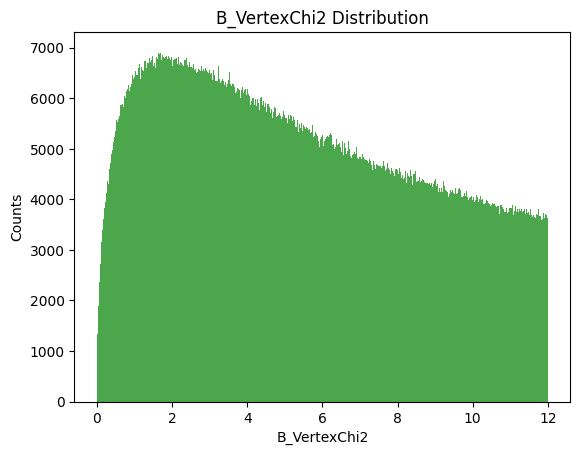

In [22]:
#Make plots of H1/H2/H3 _ProbK on one plot
H1_probk = Events['H1_ProbK'].array()
H2_probk = Events['H2_ProbK'].array()
H3_probk = Events['H3_ProbK'].array()

plt.figure()

plt.hist(H1_probk, bins=100, range=(0,1), color='blue', alpha=0.5, label='H1')
plt.hist(H2_probk, bins=100, range=(0,1), color='yellow', alpha=0.5, label='H2')
plt.hist(H3_probk, bins=100, range=(0,1), color='red', alpha=0.5, label='H3')
plt.xlabel('Kaon Probability')
plt.ylabel('Counts')
plt.title('H1, H2, H3 Kaon Probability Distribution')
plt.legend()
plt.show()


#Make plots of H1/H2/H3 _ProbPi on one plot
H1_probpi = Events['H1_ProbPi'].array()
H2_probpi = Events['H2_ProbPi'].array()
H3_probpi = Events['H3_ProbPi'].array()

plt.figure();
plt.hist(H1_probpi, bins=100, range=(0,1), color='blue', alpha=0.5, label='H1')
plt.hist(H2_probpi, bins=100, range=(0,1), color='yellow', alpha=0.5, label='H2')
plt.hist(H3_probpi, bins=100, range=(0,1), color='red', alpha=0.5, label='H3')
plt.xlabel('Pion Probability')
plt.ylabel('Counts')
plt.title('H1, H2, H3 Pion Probability Distribution')
plt.legend()
plt.show()

#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2 = Events['B_VertexChi2'].array()

plt.figure()
plt.hist(B_VertexChi2, bins=1000, color='green', alpha=0.7)
plt.xlabel('B_VertexChi2')
plt.ylabel('Counts')
plt.title('B_VertexChi2 Distribution')
plt.show()

# Plot any other variables from the list above you think would be handy to use in a selection...

Using these plots, we can now think about making a preselection. This has some format like the below:

In [23]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)

# H1, H2, H3 are more likely to be Kaons than Pions
# H1, H2, H3 are not identified as muons
selection = (
    (H1_probk > H1_probpi) &
    (H2_probk > H2_probpi) &
    (H3_probk > H3_probpi) &
    (Events['H1_isMuon'].array() == 0) &
    (Events['H2_isMuon'].array() == 0) &
    (Events['H3_isMuon'].array() == 0)
)


Number of events after selection: 5135823


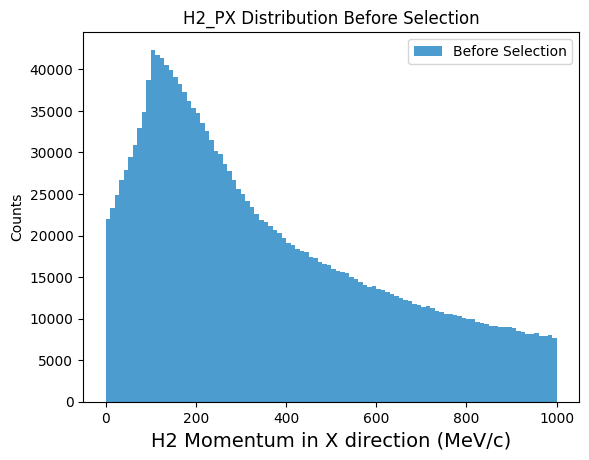

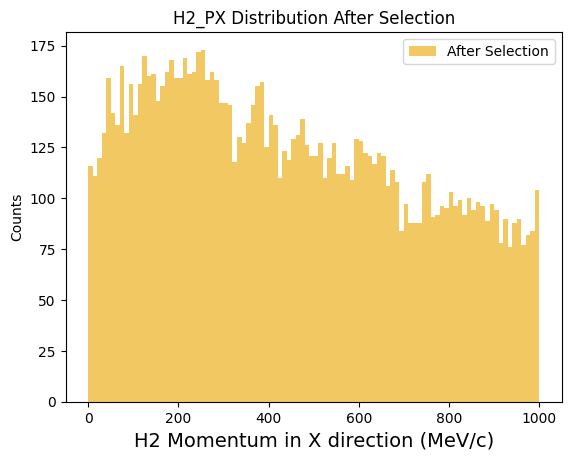

In [25]:
#To apply the selection - we can use the selection command after our instruction e.g.:
CutTree = Events.arrays(cut = selection)

# Print the number of events after selection
print(f"Number of events after selection: {len(CutTree)}")


#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

H2_PX = Events['H2_PX'].array()

#Try plotting our H2_PX distribution with and without the selection and spot the differences...

plt.figure()
plt.hist(H2_PX, bins=100, range=(0,1000), color='#0072BD', alpha=0.7, label='Before Selection')
plt.xlabel('H2 Momentum in X direction (MeV/c)', fontsize=14)
plt.ylabel('Counts')
plt.title('H2_PX Distribution Before Selection')
plt.legend()
plt.show()

plt.figure()
plt.hist(H2_PX[selection], bins=100, range=(0,1000), color='#EDB120', alpha=0.7, label='After Selection')
plt.xlabel('H2 Momentum in X direction (MeV/c)', fontsize=14)
plt.ylabel('Counts')
plt.title('H2_PX Distribution After Selection')
plt.legend()
plt.show()



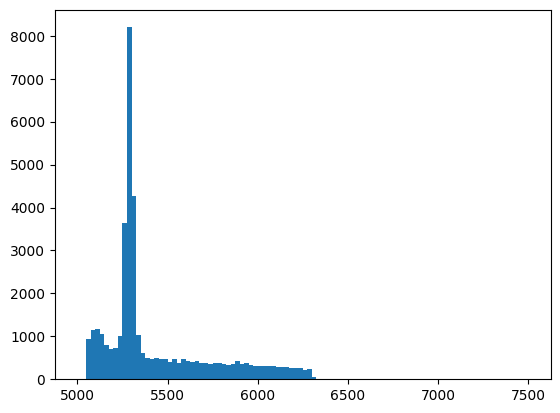

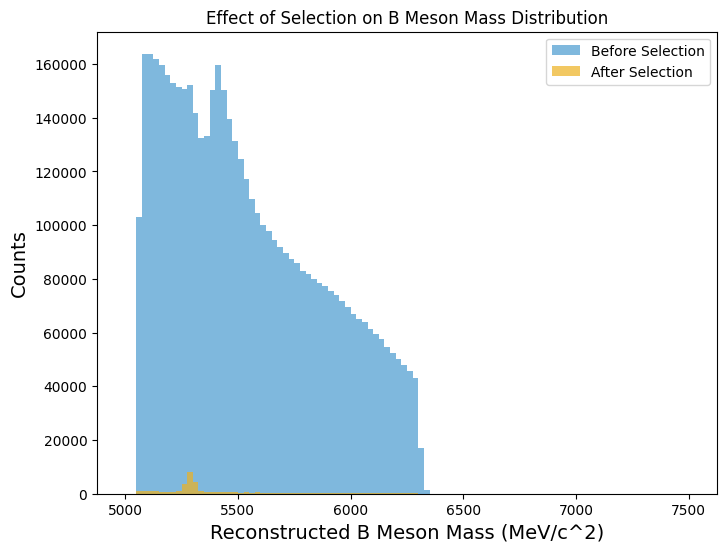

Number of B meson events before selection: 5135823
Number of B meson events after selection: 38744


In [28]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)

# Apply selection to the B meson mass
cut_Bmass = B_mass[selection]

plt.figure();
plt.hist (cut_Bmass, bins=100, range = (5000, 7500))
plt.show()

#What do you notice about your histogram now?
plt.figure(figsize=(8,6))
plt.hist(B_mass, bins=100, range=(5000, 7500), color='#0072BD', alpha=0.5, label='Before Selection')
plt.hist(cut_Bmass, bins=100, range=(5000, 7500), color='#EDB120', alpha=0.7, label='After Selection')
plt.xlabel('Reconstructed B Meson Mass (MeV/c^2)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Effect of Selection on B Meson Mass Distribution')
plt.legend()
plt.show()

#You can also use len() to find the number of entries in each.
print(f"Number of B meson events before selection: {len(B_mass)}")
print(f"Number of B meson events after selection: {len(cut_Bmass)}")

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

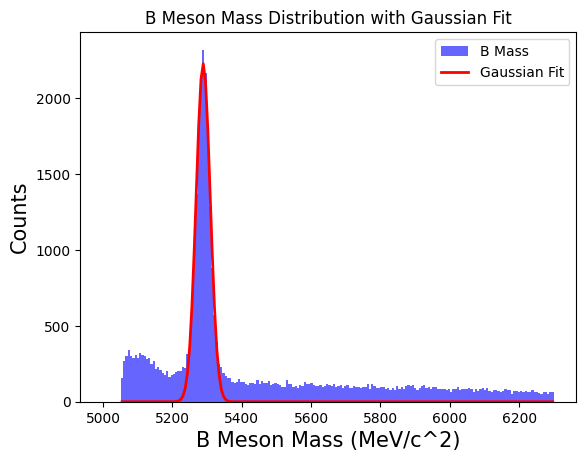

In [118]:
# Grab another package
from scipy.optimize import curve_fit

# Start by defining the variable we are interested in...
B_Mass = B_mass[selection]

min = 5000
max = 6300

# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
bin_height, bin_edge, _= plt.hist(B_Mass, bins=200, range = (min, max), label = "B Mass", alpha=0.6, color='blue')

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x_data = (bin_edge[1:] + bin_edge[:-1])/2
y_data = bin_height
# remove any initial values with 0s for later part (X2)
first_non_zero_value_index = np.where(y_data > 0)[0][0]
y_data = y_data[first_non_zero_value_index:]
x_data = x_data[first_non_zero_value_index:]

#Create a Gauss function for fitting - nothing needs changing here
def gauss (x, *p):
    A, mu, sigma = p # A: amplitude, mu: mean, sigma: standard deviation
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# Get the fitted curve - some things need changing here
p0 = [np.max(y_data), np.mean(B_Mass), np.std(B_Mass)]
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0 = p0);

#note you need to pick some initial parameters in p0= above!

yfit = gauss(x_data, *optimisedParameters)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well

plt.plot(x_data, yfit, color='red', linewidth=2, label='Gaussian Fit')

plt.xlabel("B Meson Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.title("B Meson Mass Distribution with Gaussian Fit")
plt.legend()
plt.show()

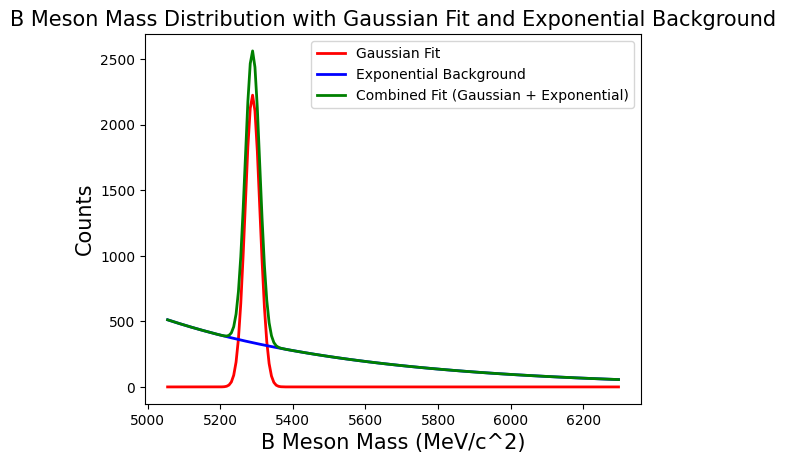

In [119]:
# Explore optimisedParameters - what does it contain?
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...

def exp_bkg(x, *p):
    B, lambda_ = p  # B: amplitude, lambda_: decay constant
    return B * np.exp(-x / lambda_)

p0Exp = [np.max(y_data), 500]
optimisedParametersExp, pcovExp = curve_fit(exp_bkg, x_data, y_data, p0 = p0Exp);
yfitExp = exp_bkg(x_data, *optimisedParametersExp)

plt.plot(x_data, yfit, color='red', linewidth=2, label='Gaussian Fit')
plt.plot(x_data, yfitExp, color='blue', linewidth=2, label='Exponential Background')


plt.xlabel("B Meson Mass (MeV/c^2)", fontsize=15)
plt.ylabel("Counts", fontsize=15)
plt.title("B Meson Mass Distribution with Gaussian Fit and Exponential Background", fontsize=15)

combined_fit = gauss(x_data, *optimisedParameters) + exp_bkg(x_data, *optimisedParametersExp)
plt.plot(x_data, combined_fit, color='green', linewidth=2, label='Combined Fit (Gaussian + Exponential)')
plt.legend()
plt.show()


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [121]:
signal_yield = optimisedParameters[0]
bck_yield = optimisedParametersExp[0]
signal_yield_error = np.sqrt(pcov[0, 0])
bck_yield_error = np.sqrt(pcovExp[0, 0])

# can't figure out how to call .chiSquare from B_Mass = tree["B_Mass"].array() or from
# Events = f['DecayTree']
# Events = f['DecayTree'].chiSquare >> is this because of using uproot?

def chi_squared(y_data, y_fit, y_data_error):
    return np.sum(((y_data - y_fit) ** 2) / (y_data_error ** 2))

y_data_error = np.sqrt(y_data)
chi2_gauss = chi_squared(y_data, yfit, y_data_error)
chi2_exp = chi_squared(y_data, yfitExp, y_data_error)

print(f"Signal Yield: {signal_yield} +/- {signal_yield_error}")
print(f"Background Yield: {bck_yield} +/- {bck_yield_error}")

Signal Yield: 2225.827527872755 +/- 68.38769898206259
Background Yield: 4159932.12810992 +/- 8603073.530798828


# Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

In [134]:
print(H1_charge)
B_plus_events = []
B_minus_events = []
print(len(H1_charge))
for idx in range(len(H1_charge)):
    # Count the number of positive charges in the three particles
    num_positive_charges = (H1_charge[idx] > 0) + (H2_charge[idx] > 0) + (H3_charge[idx] > 0)

    if num_positive_charges == 1:
        B_minus_events.append(idx)  # Assign event to B-
    elif num_positive_charges == 2:
        B_plus_events.append(idx)  # Assign event to B+
    if idx %10000 == 0:
        print(f"Processing event {idx}")

#takes around 10 min to run, not sure if this is correct

[-1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, ..., -1, 1, -1, 1, -1, 1, 1, 1, 1, -1]
5135823
Processed 0 events
Processed 10000 events
Processed 20000 events
Processed 30000 events
Processed 40000 events
Processed 50000 events
Processed 60000 events
Processed 70000 events
Processed 80000 events
Processed 90000 events
Processed 100000 events
Processed 110000 events
Processed 120000 events
Processed 130000 events
Processed 140000 events
Processed 150000 events
Processed 160000 events
Processed 170000 events
Processed 180000 events
Processed 190000 events
Processed 200000 events
Processed 210000 events
Processed 220000 events
Processed 230000 events
Processed 240000 events
Processed 250000 events
Processed 260000 events
Processed 270000 events
Processed 280000 events
Processed 290000 events
Processed 300000 events
Processed 310000 events
Processed 320000 events
Processed 330000 events
Processed 340000 events
Processed 350000 events
Processed 360000 events
Processed 370000 events
Processed 38000

In [144]:
B_plus_data = Events.arrays(filter_name="*", entry_start = 0, entry_stop = -1)
B_minus_data = Events.arrays(filter_name="*", entry_start = 0, entry_stop = -1)


print(f"Number of B+ events: {len(B_plus_events)}")
print(f"Number of B- events: {len(B_minus_events)}")



Number of B+ events: 0
Number of B- events: 5135823


Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [145]:
### what preselection ?

B_plus_mass = B_plus_data['B_mass']
params_plus, cov_plus = curve_fit(gauss, B_plus_mass, np.histogram(B_plus_mass, bins=50)[0], p0=[100, 5.28, 0.01])

B_minus_mass = B_minus_data['B_mass']
params_minus, cov_minus = curve_fit(gauss, B_minus_mass, np.histogram(B_minus_mass, bins=50)[0], p0=[100, 5.28, 0.01])

NB_plus = params_plus[0]
NB_minus = params_minus[0]

A = (NB_minus - NB_plus) / (NB_minus + NB_plus)

sigma_A = np.sqrt((1 - A**2) / (NB_plus + NB_minus))
print(f"Asymmetry (A): {A}")
print(f"Uncertainty on asymmetry (σA): {sigma_A}")

FieldNotFoundError: no field 'B_mass' in record with 26 fields

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other.

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)